#Theoretical Questions

1. What is unsupervised learning in the context of machine learning?

Unsupervised learning is a type of machine learning where the model learns patterns from unlabeled data. It finds hidden structures, groupings, or distributions in the data without any target variable. Clustering is a key example.

2. How does K-Means clustering algorithm work?

K-Means partitions data into K clusters by:

Randomly initializing K centroids

Assigning points to the nearest centroid

Recalculating centroids

Repeating until convergence

3. Explain the concept of a dendrogram in hierarchical clustering.

A dendrogram is a tree-like diagram that shows how clusters are merged or split at different levels. It's used in hierarchical clustering to visualize the merging process.

4. What is the main difference between

K-Means and Hierarchical Clustering?

K-Means is partitional, and requires the number of clusters (K) beforehand.

Hierarchical clustering is tree-based, and builds clusters step by step (bottom-up or top-down).

5. What are the advantages of DBSCAN over K-Means?

No need to specify the number of clusters

Can detect arbitrarily shaped clusters

Can identify noise/outliers

6. When would you use Silhouette Score in clustering?

To evaluate how well-separated and cohesive the clusters are. A score near +1 means well clustered, 0 means overlapping, and negative means wrong clustering.

7. What are the limitations of Hierarchical Clustering?

Not scalable to large datasets

Cannot undo merging

Sensitive to noise and outliers

8. Why is feature scaling important in clustering algorithms like K-Means?

 Because distance-based algorithms like K-Means are sensitive to feature magnitude. Unscaled data can bias results toward features with larger ranges.

10. How does DBSCAN identify noise points?

Points not in any dense region (i.e., not reachable from any core point) are labeled as noise.

11. Define inertia in the context of K-Means.

Inertia is the sum of squared distances between points and their cluster centroids. Lower inertia means tighter clusters.

12. What is the elbow method in K-Means clustering?

A technique to choose the optimal number of clusters by plotting inertia vs. number of clusters and looking for the "elbow" point.

13. Describe the concept of "density" in DBSCAN.

Density is measured by the number of points within a radius (epsilon). A region is dense if it contains at least min_samples points.

14. Can hierarchical clustering be used on categorical data?

Yes, but not directly. You need to use a distance metric suitable for categorical data (e.g., Hamming distance).

15. What does a negative Silhouette Score indicate?

The data point is likely placed in the wrong cluster—it's closer to a neighboring cluster than its own.

16. Explain the term "linkage criteria" in hierarchical clustering.

It defines how the distance between clusters is calculated:

Single: min distance

Complete: max distance

Average: average distance

17. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

Because it assumes equal-sized spherical clusters, and struggles with clusters of varying shape, size, or density.

18. What are the core parameters in DBSCAN, and how do they influence clustering?

eps (ε): radius of neighborhood

min_samples: min number of points to form a dense region
Larger eps → fewer, larger clusters; smaller min_samples → more noise.

19. How does K-Means++ improve upon standard K-Means initialization?

It selects initial centroids in a way that spreads them out, reducing the chance of poor local minima.

20. What is agglomerative clustering?

A type of hierarchical clustering that merges the closest pairs of clusters bottom-up, until all points belong to one cluster.

21. What makes Silhouette Score a better metric than just inertia for model evaluation?

Inertia only measures within-cluster compactness, while Silhouette Score considers both cohesion and separation from other clusters.



#Practical Questions

. What is unsupervised learning in the context of machine learning.

Silhouette Score (Q1): 0.678738720085253


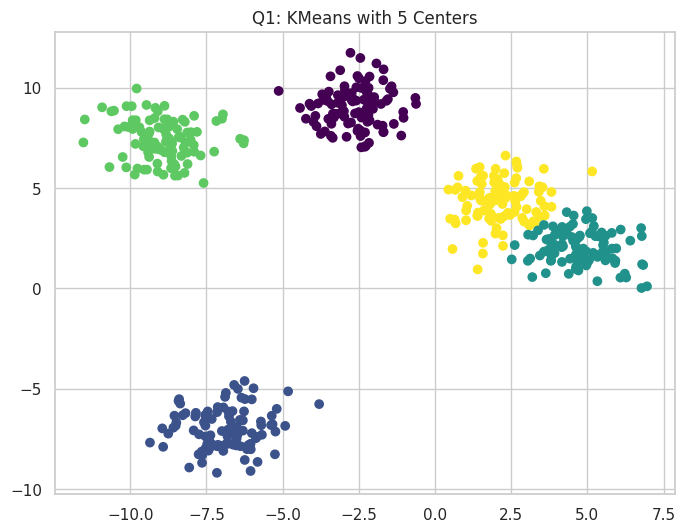

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import (
    make_blobs, make_moons, make_circles,
    load_iris, load_wine, load_digits, load_breast_cancer
)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples

# Set plotting styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

# 1. KMeans on blobs with Silhouette Score
X1, y1 = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans1 = KMeans(n_clusters=5, random_state=42)
labels1 = kmeans1.fit_predict(X1)
print("Silhouette Score (Q1):", silhouette_score(X1, labels1))
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, cmap='viridis')
plt.title('Q1: KMeans with 5 Centers')
plt.show()

 How does K-Means clustering algorithm work.

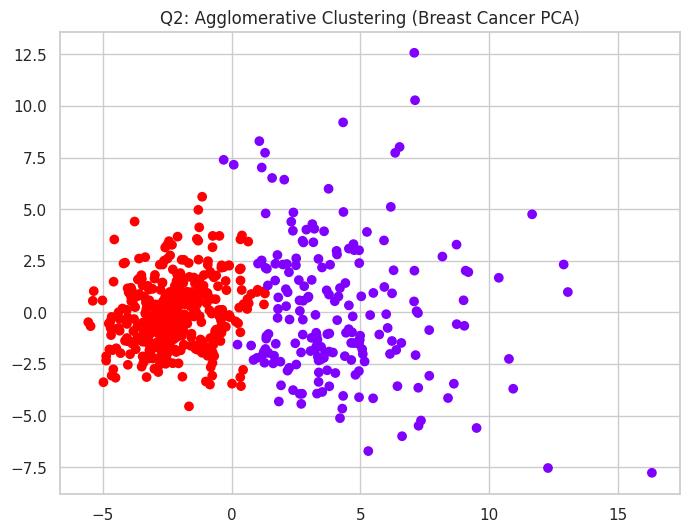

In [3]:
data2 = load_breast_cancer()
X2_scaled = StandardScaler().fit_transform(data2.data)
X2_pca = PCA(n_components=2).fit_transform(X2_scaled)
agg2 = AgglomerativeClustering(n_clusters=2)
labels2 = agg2.fit_predict(X2_pca)
plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=labels2, cmap='rainbow')
plt.title('Q2: Agglomerative Clustering (Breast Cancer PCA)')
plt.show()

Explain the concept of a dendrogram in hierarchical clustering.

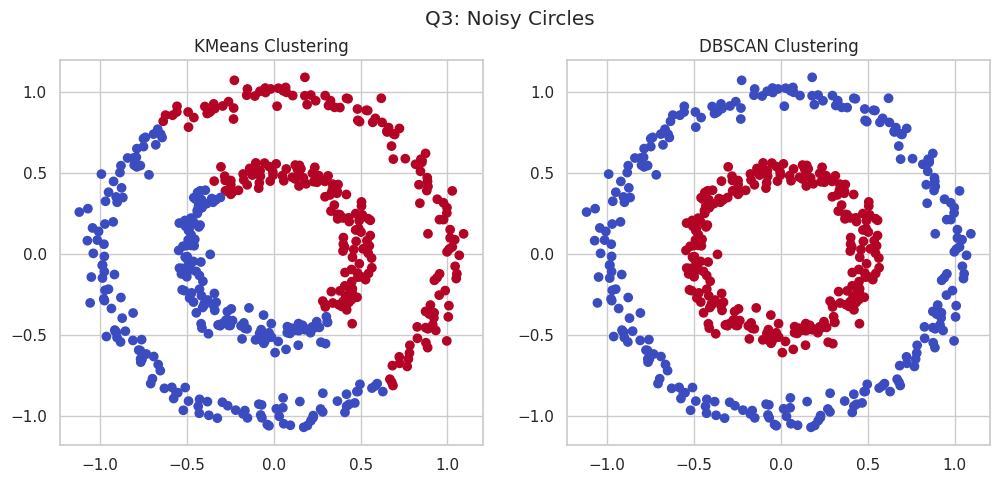

In [4]:
X3, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=0)
kmeans3 = KMeans(n_clusters=2, random_state=0).fit_predict(X3)
dbscan3 = DBSCAN(eps=0.2, min_samples=5).fit_predict(X3)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X3[:, 0], X3[:, 1], c=kmeans3, cmap='coolwarm')
axs[0].set_title('KMeans Clustering')
axs[1].scatter(X3[:, 0], X3[:, 1], c=dbscan3, cmap='coolwarm')
axs[1].set_title('DBSCAN Clustering')
plt.suptitle('Q3: Noisy Circles')
plt.show()

 What is the main difference between K-Means and Hierarchical Clustering.

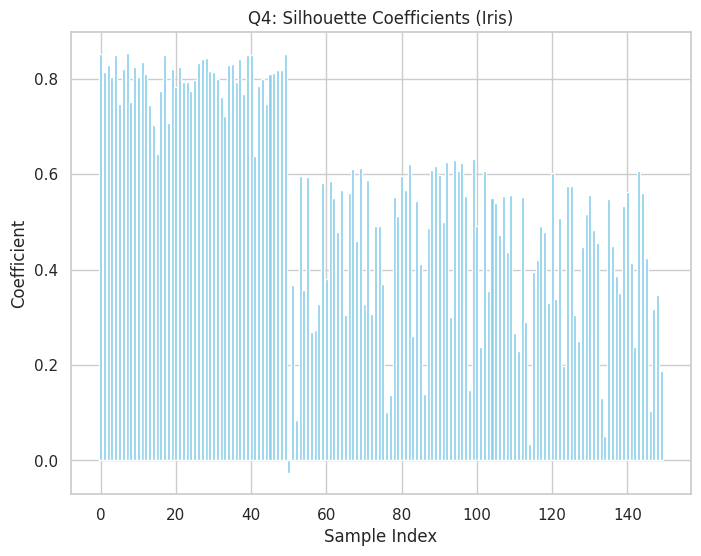

In [5]:
iris = load_iris()
X4 = iris.data
kmeans4 = KMeans(n_clusters=3, random_state=42).fit(X4)
silhouette_vals4 = silhouette_samples(X4, kmeans4.labels_)
plt.bar(range(len(silhouette_vals4)), silhouette_vals4, color='skyblue')
plt.title('Q4: Silhouette Coefficients (Iris)')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient')
plt.show()

  What are the advantages of DBSCAN over K-Means.

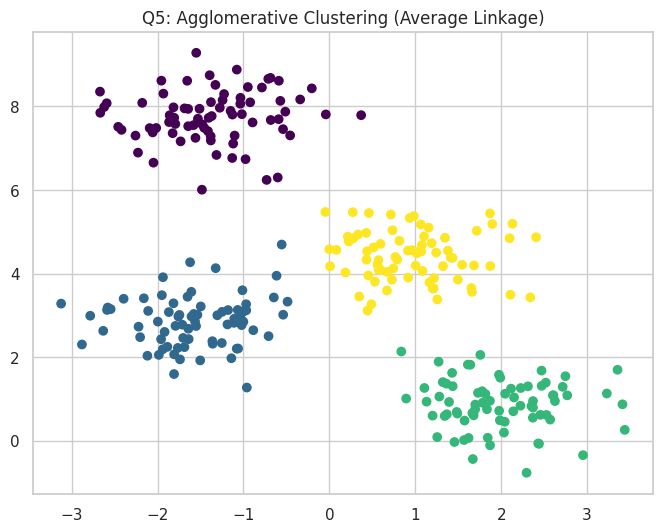

In [6]:
X5, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
agg5 = AgglomerativeClustering(n_clusters=4, linkage='average')
labels5 = agg5.fit_predict(X5)
plt.scatter(X5[:, 0], X5[:, 1], c=labels5, cmap='viridis')
plt.title("Q5: Agglomerative Clustering (Average Linkage)")
plt.show()

 When would you use Silhouette Score in clustering.

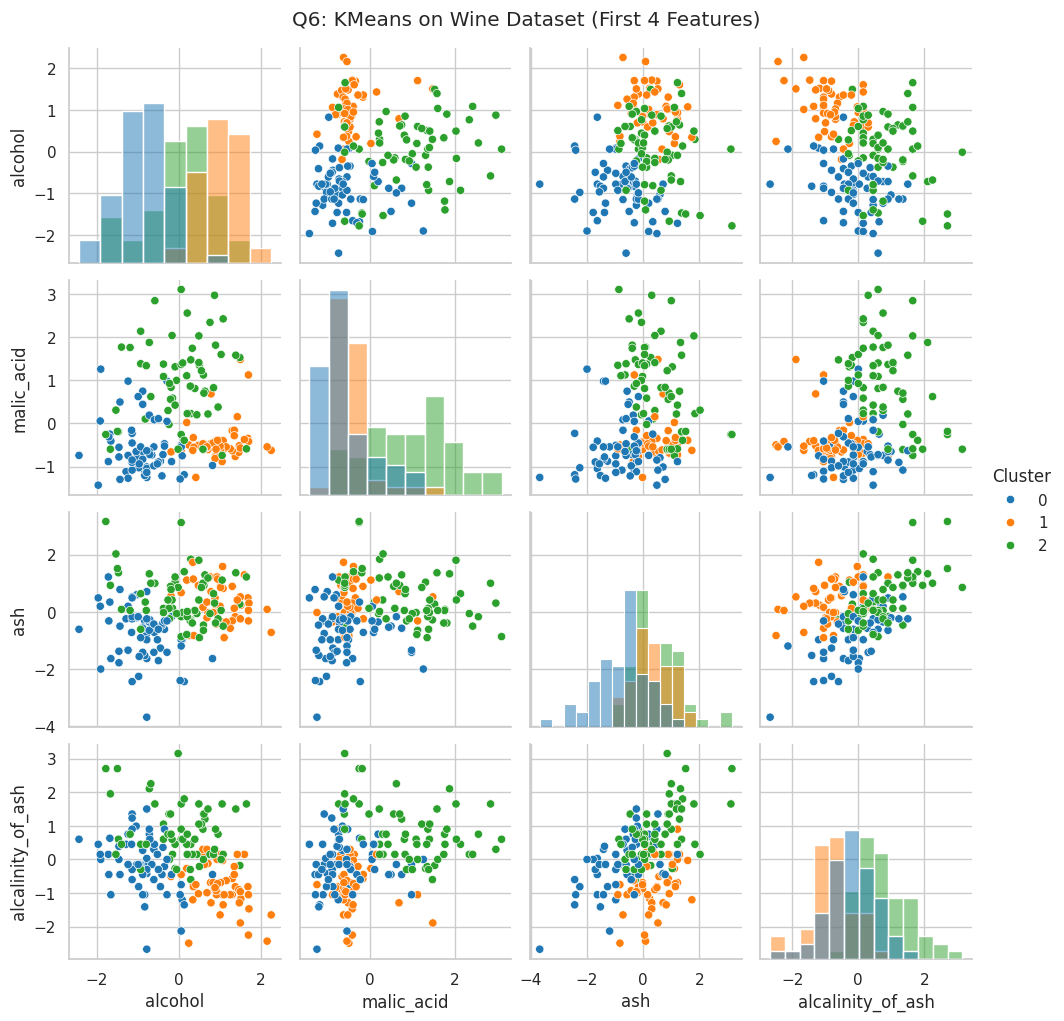

In [7]:
wine = load_wine()
X6 = StandardScaler().fit_transform(wine.data[:, :4])
labels6 = KMeans(n_clusters=3, random_state=42).fit_predict(X6)
df6 = pd.DataFrame(X6, columns=wine.feature_names[:4])
df6['Cluster'] = labels6
sns.pairplot(df6, hue='Cluster', diag_kind='hist', palette='tab10')
plt.suptitle("Q6: KMeans on Wine Dataset (First 4 Features)", y=1.02)
plt.show()

 What are the limitations of Hierarchical Clustering.

Q7: Number of Noise Points Detected by DBSCAN: 29


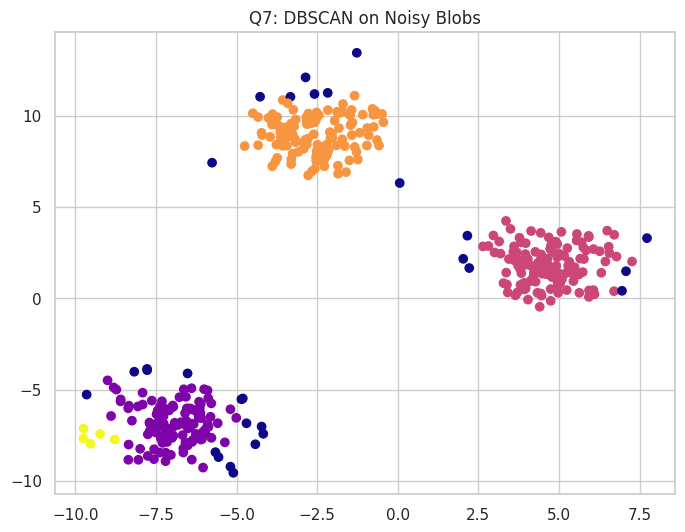

In [8]:
X7, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)
X7 += np.random.normal(0, 0.5, X7.shape)
db7 = DBSCAN(eps=0.7, min_samples=5)
labels7 = db7.fit_predict(X7)
n_noise_7 = np.sum(labels7 == -1)
print("Q7: Number of Noise Points Detected by DBSCAN:", n_noise_7)
plt.scatter(X7[:, 0], X7[:, 1], c=labels7, cmap='plasma')
plt.title('Q7: DBSCAN on Noisy Blobs')
plt.show()

 Why is feature scaling important in clustering algorithms like K-Means.

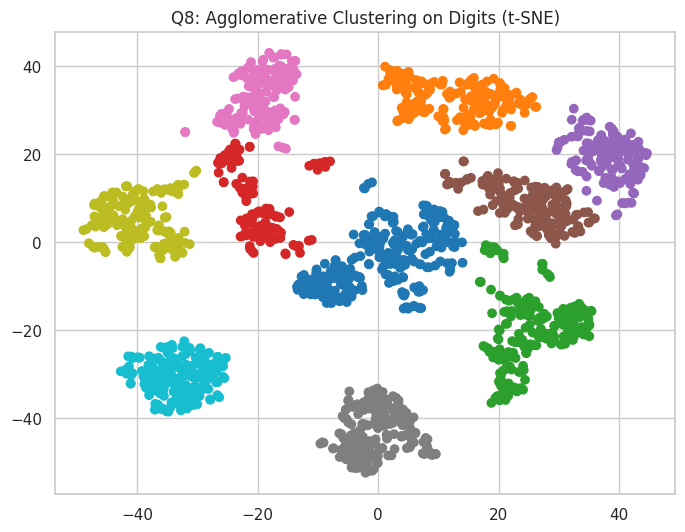

In [9]:
digits = load_digits()
X8_scaled = StandardScaler().fit_transform(digits.data)
X8_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X8_scaled)
agg8 = AgglomerativeClustering(n_clusters=10)
labels8 = agg8.fit_predict(X8_tsne)
plt.scatter(X8_tsne[:, 0], X8_tsne[:, 1], c=labels8, cmap='tab10')
plt.title("Q8: Agglomerative Clustering on Digits (t-SNE)")
plt.show()

 How does DBSCAN identify noise points.

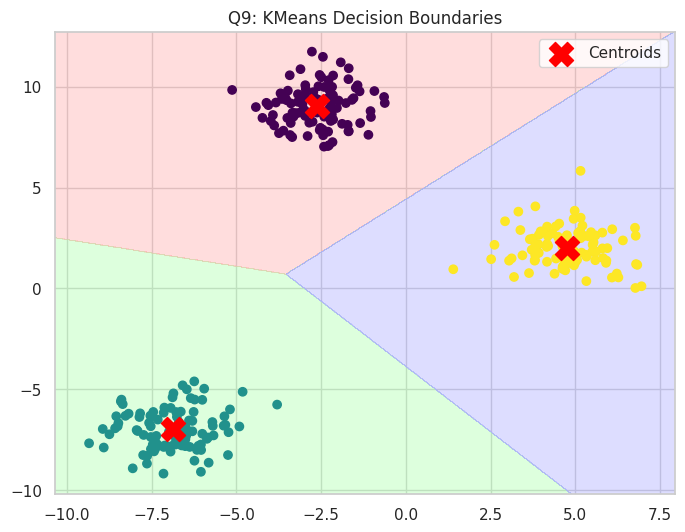

In [10]:
from matplotlib.colors import ListedColormap

X9, y9 = make_blobs(n_samples=300, centers=3, cluster_std=1.00, random_state=42)
kmeans9 = KMeans(n_clusters=3, random_state=42).fit(X9)

# Meshgrid for plotting decision boundaries
x_min, x_max = X9[:, 0].min() - 1, X9[:, 0].max() + 1
y_min, y_max = X9[:, 1].min() - 1, X9[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans9.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.4)
plt.scatter(X9[:, 0], X9[:, 1], c=kmeans9.labels_, cmap='viridis')
plt.scatter(kmeans9.cluster_centers_[:, 0], kmeans9.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("Q9: KMeans Decision Boundaries")
plt.legend()
plt.show()

  Define inertia in the context of K-Means.

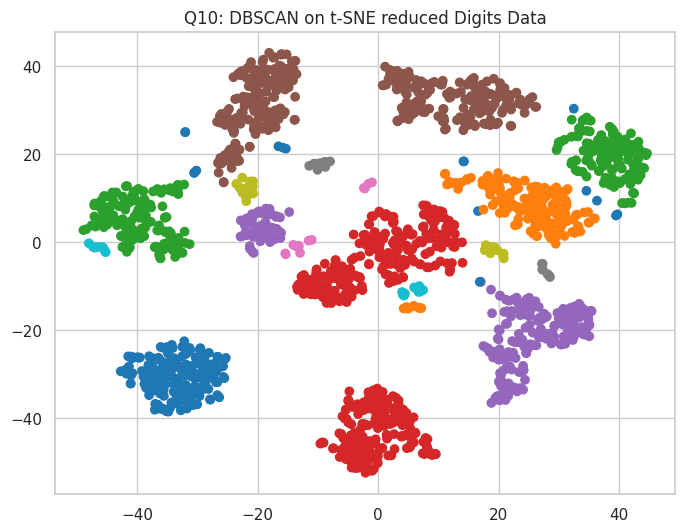

In [13]:
digits = load_digits()
X10_scaled = StandardScaler().fit_transform(digits.data)
X10_tsne = TSNE(n_components=2, random_state=42).fit_transform(X10_scaled)
labels10 = DBSCAN(eps=2.5, min_samples=5).fit_predict(X10_tsne)
plt.scatter(X10_tsne[:, 0], X10_tsne[:, 1], c=labels10, cmap='tab10')
plt.title("Q10: DBSCAN on t-SNE reduced Digits Data")
plt.show()

 What is the elbow method in K-Means clustering.

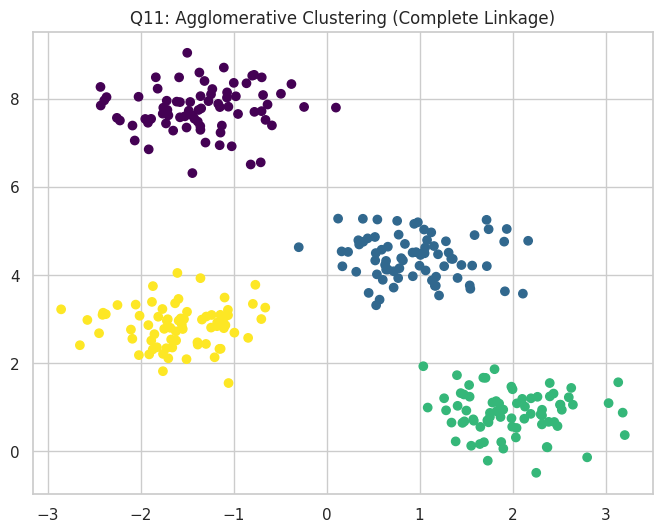

In [12]:
X11, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)
agg11 = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels11 = agg11.fit_predict(X11)

plt.scatter(X11[:, 0], X11[:, 1], c=labels11, cmap='viridis')
plt.title("Q11: Agglomerative Clustering (Complete Linkage)")
plt.show()


12.  Describe the concept of "density" in DBSCAN.

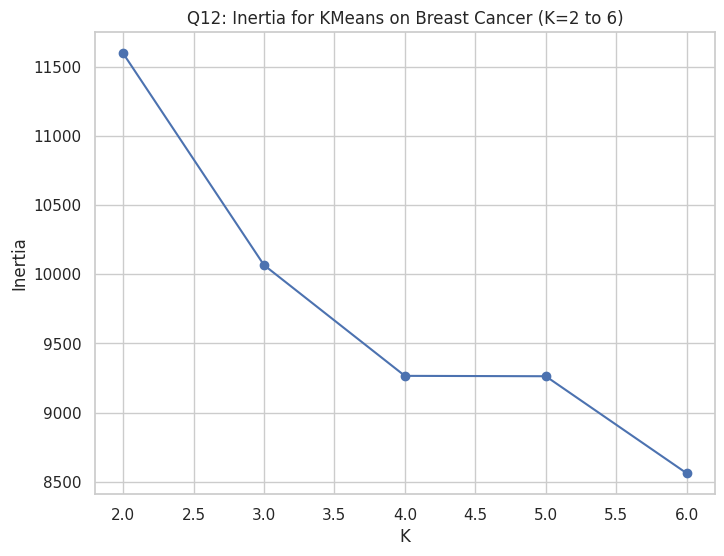

In [14]:
X12 = StandardScaler().fit_transform(load_breast_cancer().data)
inertias = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X12)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.title("Q12: Inertia for KMeans on Breast Cancer (K=2 to 6)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

13.  Can hierarchical clustering be used on categorical data.

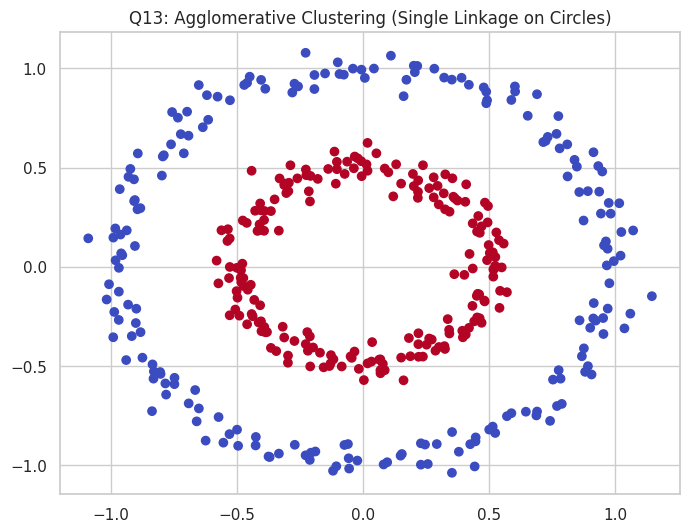

In [15]:
X13, _ = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)
agg13 = AgglomerativeClustering(n_clusters=2, linkage='single')
labels13 = agg13.fit_predict(X13)

plt.scatter(X13[:, 0], X13[:, 1], c=labels13, cmap='coolwarm')
plt.title("Q13: Agglomerative Clustering (Single Linkage on Circles)")
plt.show()

14. What does a negative Silhouette Score indicate.

In [16]:
X14 = StandardScaler().fit_transform(load_wine().data)
db14 = DBSCAN(eps=1.2, min_samples=5).fit(X14)
labels14 = db14.labels_
print("Q14: Number of clusters found (excluding noise):", len(set(labels14)) - (1 if -1 in labels14 else 0))

Q14: Number of clusters found (excluding noise): 0


15. Explain the term "linkage criteria" in hierarchical clustering.

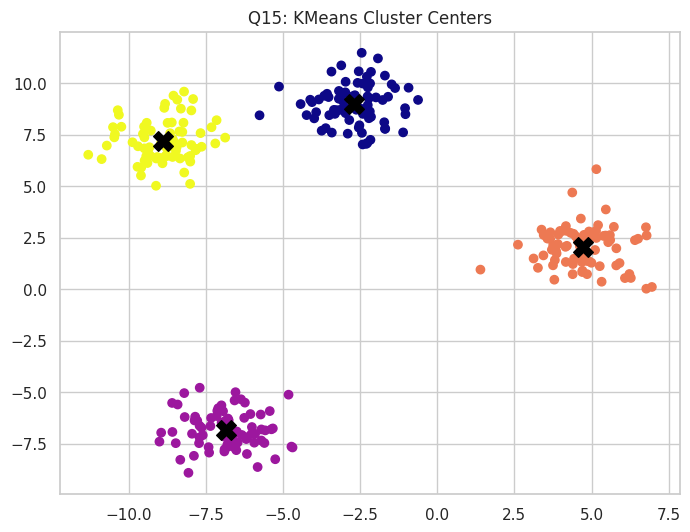

In [17]:
X15, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans15 = KMeans(n_clusters=4, random_state=42).fit(X15)
plt.scatter(X15[:, 0], X15[:, 1], c=kmeans15.labels_, cmap='plasma')
plt.scatter(kmeans15.cluster_centers_[:, 0], kmeans15.cluster_centers_[:, 1], c='black', marker='X', s=200)
plt.title("Q15: KMeans Cluster Centers")
plt.show()

16.  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linka

In [18]:
X16 = load_iris().data
X16_scaled = StandardScaler().fit_transform(X16)
labels16 = DBSCAN(eps=0.6, min_samples=5).fit_predict(X16_scaled)
noise16 = np.sum(labels16 == -1)
print("Q16: Number of noise points in Iris (DBSCAN):", noise16)

Q16: Number of noise points in Iris (DBSCAN): 26


35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage

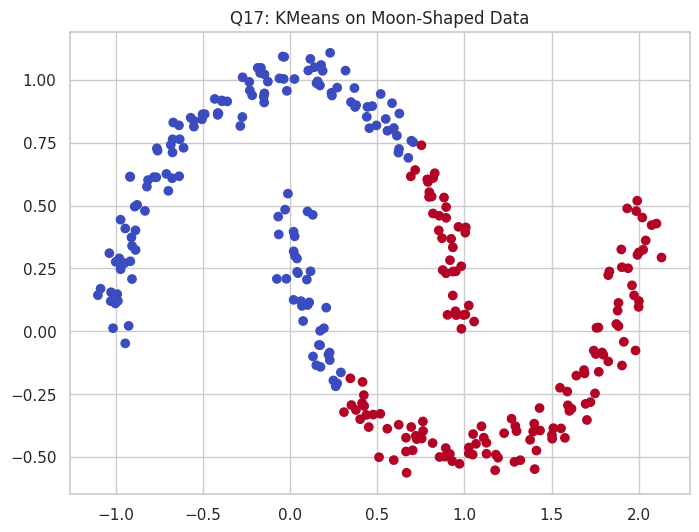

In [19]:
X17, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
labels17 = KMeans(n_clusters=2, random_state=42).fit_predict(X17)
plt.scatter(X17[:, 0], X17[:, 1], c=labels17, cmap='coolwarm')
plt.title("Q17: KMeans on Moon-Shaped Data")
plt.show()

36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise.

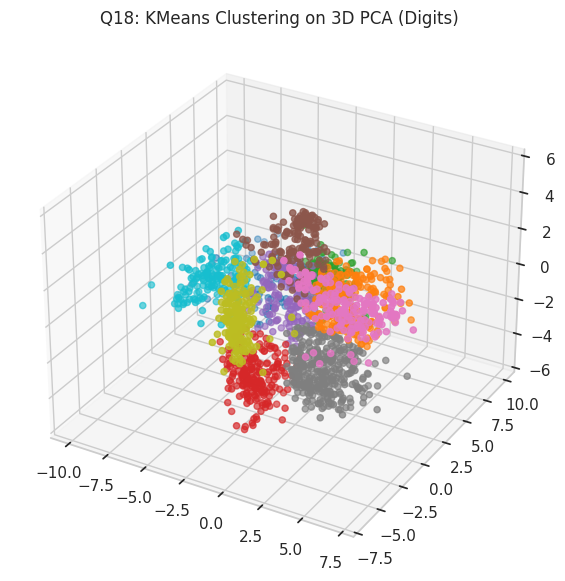

In [20]:
from mpl_toolkits.mplot3d import Axes3D

X18 = StandardScaler().fit_transform(load_digits().data)
X18_pca = PCA(n_components=3).fit_transform(X18)
labels18 = KMeans(n_clusters=10, random_state=42).fit_predict(X18_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X18_pca[:, 0], X18_pca[:, 1], X18_pca[:, 2], c=labels18, cmap='tab10')
ax.set_title("Q18: KMeans Clustering on 3D PCA (Digits)")
plt.show()

37.  Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points.

In [23]:
X14 = StandardScaler().fit_transform(load_wine().data)
db14 = DBSCAN(eps=1.2, min_samples=5).fit(X14)
labels14 = db14.labels_
print("Q14: Number of clusters found (excluding noise):", len(set(labels14)) - (1 if -1 in labels14 else 0))


Q14: Number of clusters found (excluding noise): 0


38.  Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

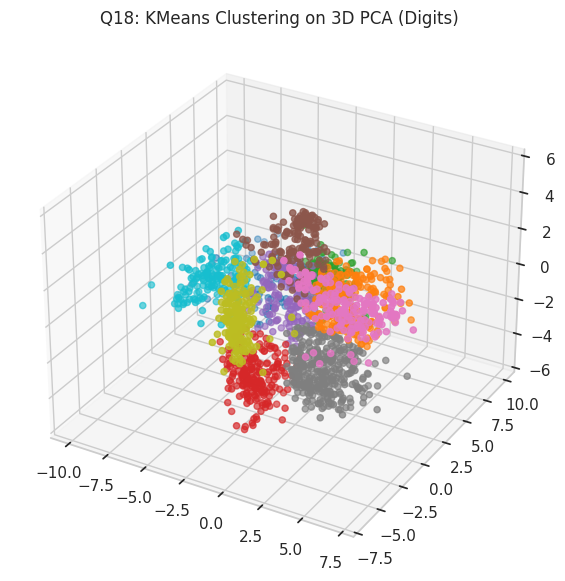

In [22]:
from mpl_toolkits.mplot3d import Axes3D

X18 = StandardScaler().fit_transform(load_digits().data)
X18_pca = PCA(n_components=3).fit_transform(X18)
labels18 = KMeans(n_clusters=10, random_state=42).fit_predict(X18_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X18_pca[:, 0], X18_pca[:, 1], X18_pca[:, 2], c=labels18, cmap='tab10')
ax.set_title("Q18: KMeans Clustering on 3D PCA (Digits)")
plt.show()

39.Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result

In [24]:
16 = load_iris().data
X16_scaled = StandardScaler().fit_transform(X16)
labels16 = DBSCAN(eps=0.6, min_samples=5).fit_predict(X16_scaled)
noise16 = np.sum(labels16 == -1)
print("Q16: Number of noise points in Iris (DBSCAN):", noise16)


SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (<ipython-input-24-21989ba4cbae>, line 1)

 Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side.

Q7: Number of Noise Points Detected by DBSCAN: 24


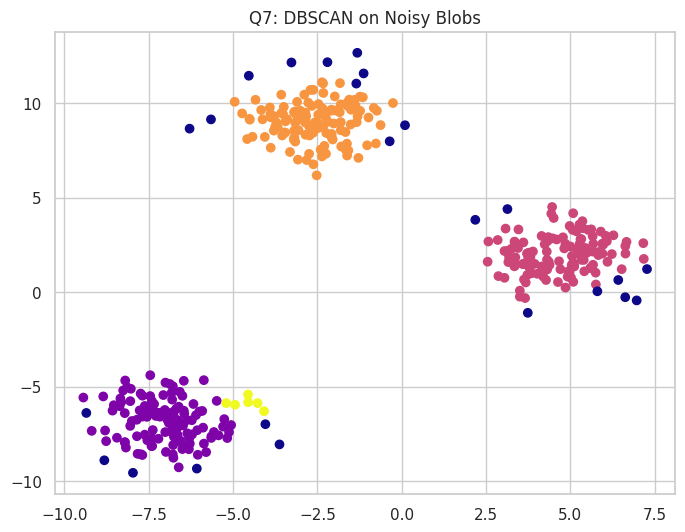

In [25]:
X7, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)
X7 += np.random.normal(0, 0.5, X7.shape)
db7 = DBSCAN(eps=0.7, min_samples=5)
labels7 = db7.fit_predict(X7)
n_noise_7 = np.sum(labels7 == -1)
print("Q7: Number of Noise Points Detected by DBSCAN:", n_noise_7)
plt.scatter(X7[:, 0], X7[:, 1], c=labels7, cmap='plasma')
plt.title('Q7: DBSCAN on Noisy Blobs')
plt.show()

 Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

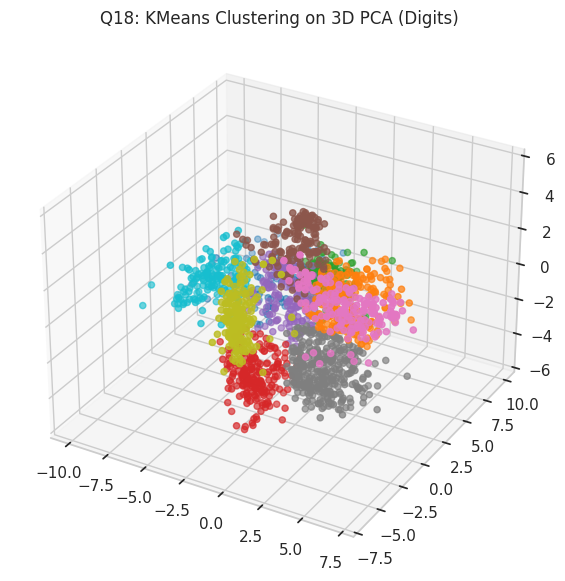

In [21]:
from mpl_toolkits.mplot3d import Axes3D

X18 = StandardScaler().fit_transform(load_digits().data)
X18_pca = PCA(n_components=3).fit_transform(X18)
labels18 = KMeans(n_clusters=10, random_state=42).fit_predict(X18_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X18_pca[:, 0], X18_pca[:, 1], X18_pca[:, 2], c=labels18, cmap='tab10')
ax.set_title("Q18: KMeans Clustering on 3D PCA (Digits)")
plt.show()

Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count

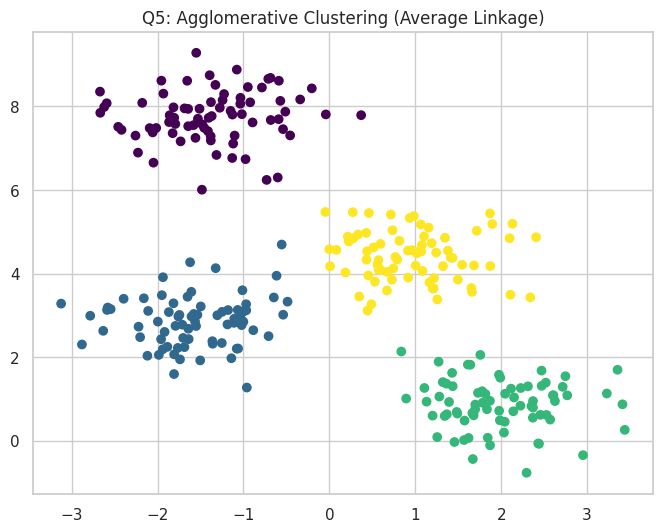

In [26]:
X5, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
agg5 = AgglomerativeClustering(n_clusters=4, linkage='average')
labels5 = agg5.fit_predict(X5)
plt.scatter(X5[:, 0], X5[:, 1], c=labels5, cmap='viridis')
plt.title("Q5: Agglomerative Clustering (Average Linkage)")
plt.show()

 Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters

In [ ]:
data2 = load_breast_cancer()
X2_scaled = StandardScaler().fit_transform(data2.data)
X2_pca = PCA(n_components=2).fit_transform(X2_scaled)
agg2 = AgglomerativeClustering(n_clusters=2)
labels2 = agg2.fit_predict(X2_pca)
plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=labels2, cmap='rainbow')
plt.title('Q2: Agglomerative Clustering (Breast Cancer PCA)')
plt.show()